<a href="https://colab.research.google.com/github/chrisalpuerto/MNIST-Digit-Recognizer/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Training with PyTorch
In this session we will be creating a handwritten digit recognition system (MNIST classificaiton with CNN on Colab)

Import dependencies

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import requests
from io import BytesIO
import tarfile
import os

In [ ]:
import os

Here we are importing our dataset using os and tarfile. I did this because I was having trouble loading dataset locally

In [ ]:
url = "http://www.di.ens.fr/~lelarge/MNIST.tar.gz"
tar_path = "MNIST.tar.gz"
extract_path = "MNIST_data"

# Step 1: Download the MNIST dataset
response = requests.get(url, stream=True)
response.raise_for_status()

# Save the downloaded file
with open(tar_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

# Step 2: Extract the tar.gz file
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

# Step 3: Load the training.pt file
train_path = os.path.join(extract_path, "MNIST", "processed", "training.pt")
x, y = torch.load(train_path)

In [ ]:
test_path = os.path.join(extract_path, "MNIST", "processed", "test.pt")

In [ ]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

Here we see the shape of our x using .size . We can see we have 60000 pieces of data with a shape of 28x28 pixels

In [ ]:
x.shape

torch.Size([60000, 28, 28])

Here we use numpy to show what the data looks like for x at index 2

In [ ]:
x[2].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Create an image of the object at x[2] using matplotlib, as well as determining the title using Y[2]

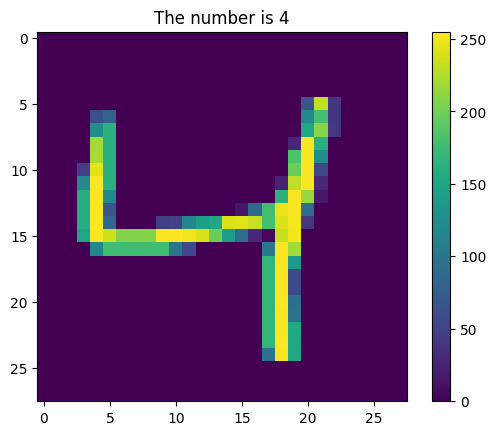

In [ ]:
plt.imshow(x[2].numpy())
plt.title(f'The number is {y[2]}')
plt.colorbar()
plt.show()

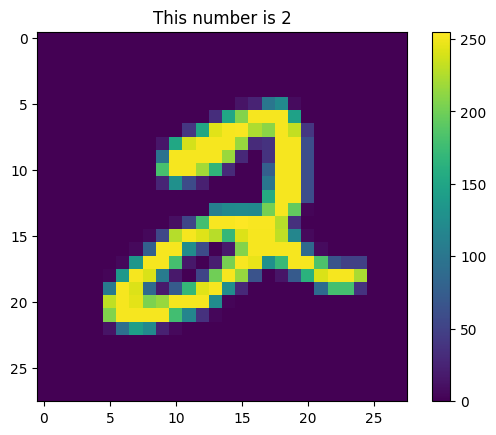

In [ ]:
plt.imshow(x[5].numpy())
plt.title(f"This number is {y[5].numpy()}")
plt.colorbar()

In [ ]:
y[2].numpy()

array(4)

In [ ]:
y_original = torch.tensor([2,4,3,0,1])

In [ ]:
F.one_hot(y_original)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [ ]:
y.shape

torch.Size([60000])

In [ ]:
y_new = F.one_hot(y, num_classes=10)

In [ ]:
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [ ]:
print(x)
print(y)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
x.shape

torch.Size([60000, 28, 28])

Since the images are 28x28 px, we want to turn the images into a vector, which is length 28^2. we do this by using .view property of tensor

In [ ]:
x.view(-1,28**2).shape

torch.Size([60000, 784])

(flattening images, as our original images were 28x28 pixels. Now the shape is in vector form)

# PyTorch Dataset Class
Here we initialize our CTDataset

In [ ]:
class CTDataset(Dataset):
  def __init__(self,filepath):
    self.x, self.y = torch.load(filepath)
    self.x = self.x / 255
    self.y = F.one_hot(self.y, num_classes=10).to(float)
  def __len__(self):
    return self.x.shape[0]
  def __getitem__(self,ix):
    return self.x[ix], self.y[ix]

In [ ]:
train_ds = CTDataset(train_path)
test_ds = CTDataset(test_path)

In [ ]:
len(train_ds)

60000

In [ ]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
xs, ys = train_ds[0:4]

In [ ]:
xs

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

# PyTorch DataLoader object
WE will then put **Dataset** objects inside a DataLoader class. Useful because we can specify a **batch_size**. Will yield a tensor where the first dimension is equal to batch_size

In [ ]:
train_dl = DataLoader(train_ds, batch_size=5)

In [ ]:
for x, y in train_dl:
  print(x.shape)
  print(y.shape)
  break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [ ]:
len(train_dl)

12000

# Cross Entropy Loss

In [ ]:
L = nn.CrossEntropyLoss()

In [ ]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(28**2, 100)
    self.Matrix2 = nn.Linear(100, 50)
    self.Matrix3 = nn.Linear(50, 10)
    self.R = nn.ReLU()
  def forward(self,x):
    x = x.view(-1,28**2)
    x = self.R(self.Matrix1(x))
    x = self.R(self.Matrix2(x))
    x = self.Matrix3(x)
    return x.squeeze()
  def method(self):
    print("This is a method")

In [ ]:
class MyNeuralNet2(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(28**2, 100)
    self.Matrix2 = nn.Linear(100, 50)
    self.Matrix3 = nn.Linear(50, 10)
    self.R = nn.ReLU()
  def forward(self,x):
    x = x.view(-1,28**2)
    x = self.R(self.Matrix1(x))
    x = self.R(self.Matrix2(x))
    x = self.Matrix3(x)
    return x.squeeze()
  def method(self):
    print("This is a method")

In [ ]:
f = MyNeuralNet()

In [ ]:
f2 = MyNeuralNet2()

In [ ]:
xs.view(-1,28**2)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
xs.shape

torch.Size([4, 28, 28])

In [ ]:
import importlib


In [ ]:
obj = MyNeuralNet()
print(obj.method())

This is a method
None


In [ ]:
f2(xs)

tensor([[ 0.0069, -0.0467, -0.0008,  0.0955, -0.1058,  0.0985,  0.1099, -0.0485,
          0.1898,  0.1674],
        [-0.0027, -0.0578, -0.0382,  0.0989, -0.1141,  0.0814,  0.0682, -0.0620,
          0.1388,  0.1098],
        [ 0.0673, -0.0580, -0.0567,  0.0633, -0.1341,  0.0804,  0.1003, -0.0843,
          0.1620,  0.1053],
        [ 0.0543, -0.0576, -0.0398,  0.1034, -0.0991,  0.0876,  0.1018, -0.0375,
          0.1754,  0.0928]], grad_fn=<SqueezeBackward0>)

should be equal to:

In [ ]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
L(f2(xs), ys)

tensor(2.3634, dtype=torch.float64, grad_fn=<DivBackward1>)

We want predictions for f2(xs) to match ys for all iamges. We will call the Loss function (L) to measure loss, as we want this number to be as small as possible. We can do this by adjusting the weights of f2

# Training
Here we will initialize our training loop
**NOTES:**
- an epoch is a full pass through entire dataset
- a loss is a measure of error, measures how far the model's preditctions are from actual labels

In [ ]:
def training_model(dl, f, n_epochs=20):
  opt = SGD(f.parameters(), lr=0.01)
  L = nn.CrossEntropyLoss()



  # train model
  losses = []
  epochs = []
  for epoch in range(n_epochs):
    print(f"Epoch: {epoch}")
    N = len(dl)
    for i , (x,y) in enumerate(dl):
      # updating weights of network
      opt.zero_grad()
      loss_value = L(f2(x),y)
      loss_value.backward()
      opt.step()
      epochs.append(epoch+i/N)
      losses.append(loss_value.item())
  return np.array(epochs), np.array(losses)

In [ ]:
epoch_data, loss_data = training_model(train_dl, f2)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19


Plot the epoch vs loss_data

Text(0.5, 1.0, 'Cross Entropy per batch')

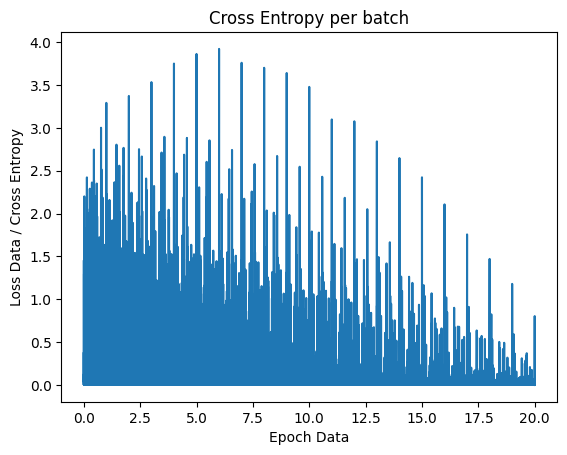

In [ ]:
plt.plot(epoch_data,loss_data)
plt.xlabel('Epoch Data')
plt.ylabel('Loss Data / Cross Entropy')
plt.title('Cross Entropy per batch')

Each data point represents to the loss devaluated on a batch of 5 images. An entire epoch is actually equal to 60000 images. We will average loss across the data per epoch to get the loss for all 60k images
- 20 total epochs, split array into 20 equal portions, take mean of each

In [ ]:
epoch_data_average = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_average = loss_data.reshape(20,-1).mean(axis=1)

As we can see, as we train overtime, the data loss decreases for each epoch

Text(0.5, 1.0, 'Cross Entropy avg per batch')

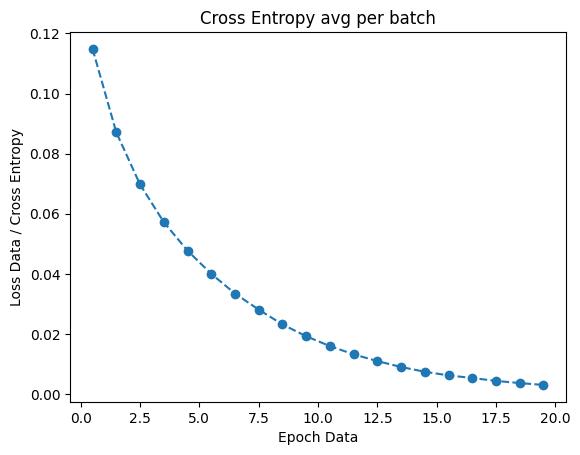

In [ ]:
plt.plot(epoch_data_average,loss_data_average, 'o--')
plt.xlabel('Epoch Data')
plt.ylabel('Loss Data / Cross Entropy')
plt.title('Cross Entropy avg per batch')
#

In [ ]:
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [ ]:
x_sample = train_ds[0][0]
yhat_sample = f2(x_sample)
yhat_sample

tensor([-10.0209,  -1.1125,   1.0295,  23.2538, -24.6117,  28.9331, -17.2120,
         -1.7314,  -0.5129,   6.4867], grad_fn=<SqueezeBackward0>)

for y sample and x sample, the most likely class will be either the '1' or largest number. As we can see, for both x and y sample, the most likely class is 5

In [ ]:
torch.argmax(yhat_sample)

tensor(5)

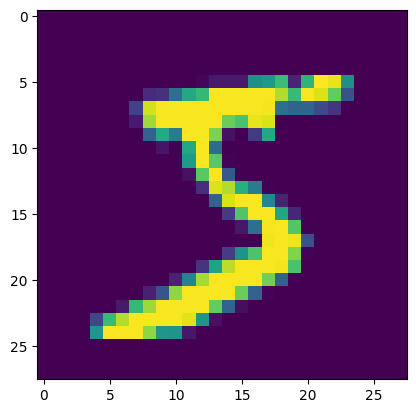

In [ ]:
plt.imshow(x_sample.view(28,28))

as we can see, y sample and x sample both equal to 5

In [ ]:
xs_sample1, ys_sample1 = train_ds[0:2000]
yhats = f2(xs_sample1).argmax(axis=1)

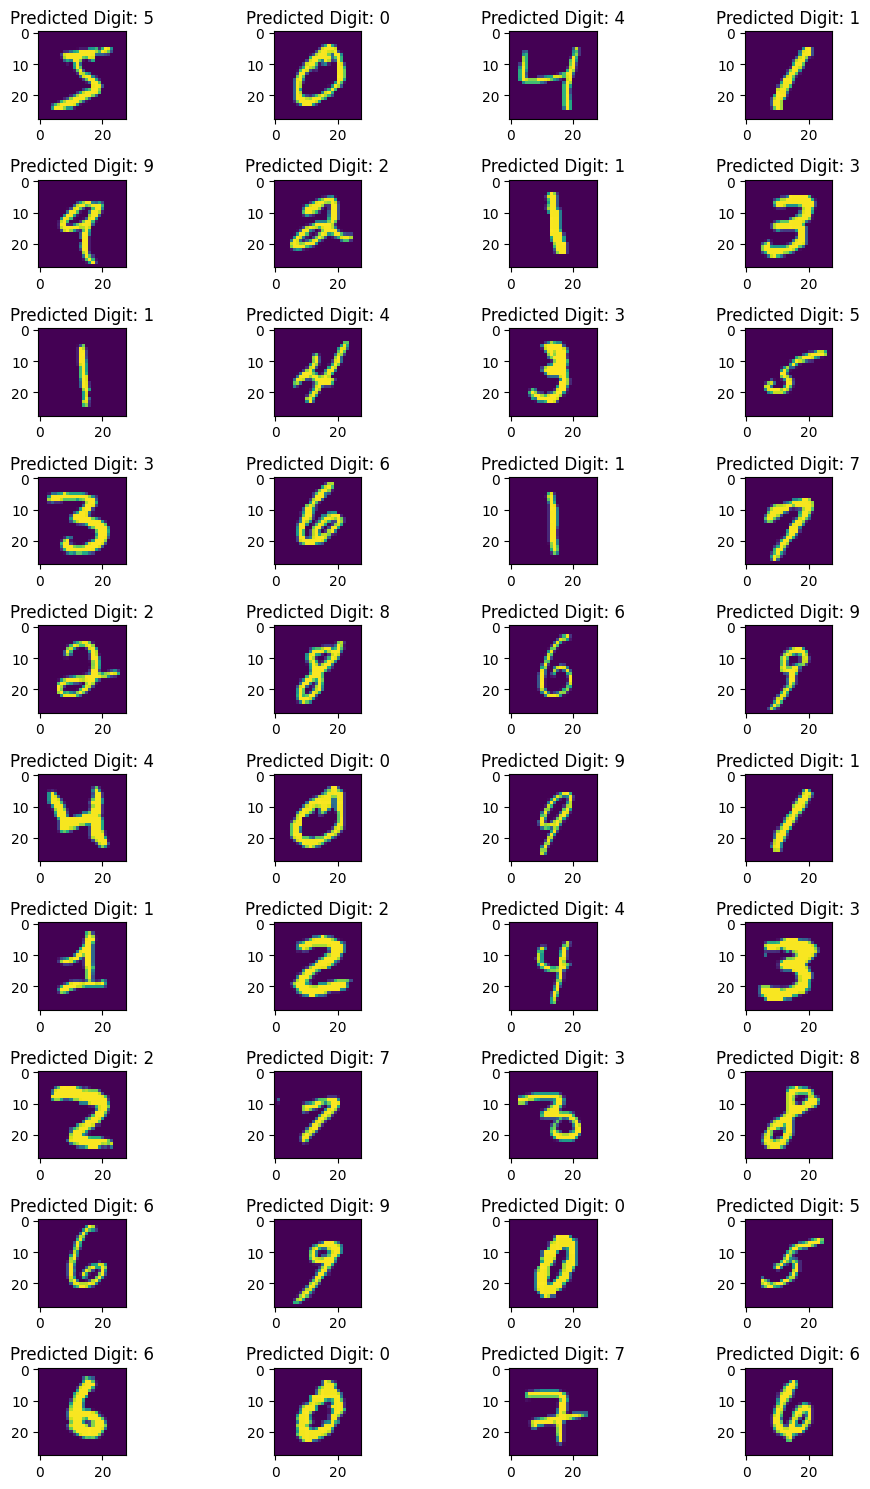

In [ ]:
fig, ax = plt.subplots(10,4, figsize=(10,15))
for i in range(40):
  plt.subplot(10,4,i+1)
  plt.imshow(xs_sample1[i])
  plt.title(f"Predicted Digit: {yhats[i]}")
fig.tight_layout()
plt.show()

# Conclusion
Here we can we that we were able to 100% detect the number for 40 numbers. We can show this for more numbers as well!